In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
import cftime


In [2]:
# Path to the file
file_path = 'Data/rss_rcp85_land-rcm_uk_region_27_mon_198012-208011.nc'

# Open lazily (does not load all data into RAM)
ds = xr.open_dataset(file_path, engine="netcdf4", chunks={})

In [3]:
print (ds)

<xarray.Dataset> Size: 192kB
Dimensions:             (ensemble_member: 1, time: 1200, region: 16, bnds: 2)
Coordinates:
  * ensemble_member     (ensemble_member) int32 4B 27
  * time                (time) object 10kB 1980-12-16 00:00:00 ... 2080-11-16...
  * region              (region) int32 64B 1 2 3 4 5 6 7 ... 11 12 13 14 15 16
    geo_region          (region) |S24 384B dask.array<chunksize=(16,), meta=np.ndarray>
    ensemble_member_id  (ensemble_member) |S27 27B dask.array<chunksize=(1,), meta=np.ndarray>
    month_number        (time) int32 5kB dask.array<chunksize=(1200,), meta=np.ndarray>
    year                (time) int32 5kB dask.array<chunksize=(1200,), meta=np.ndarray>
    yyyymm              (time) |S64 77kB dask.array<chunksize=(1200,), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    rss                 (ensemble_member, time, region) float32 77kB dask.array<chunksize=(1, 1200, 16), meta=np.ndarray>
    time_bnds           (time, bnds) object 

In [4]:
for attribute,value in ds.attrs.items():
    print (attribute, value)

collection land-rcm
contact enquiries@metoffice.gov.uk
creation_date 2018-11-22-T00:00:00
domain uk
frequency day
institution Met Office Hadley Centre (MOHC), FitzRoy Road, Exeter, Devon, EX1 3PB, UK.
institution_id MOHC
project UKCP18
references https://ukclimateprojections.metoffice.gov.uk
resolution region
scenario rcp85
source UKCP18 realisation from a set of 4 regional climate models (HadREM3-GA705) at 12km resolutiondriven by global models from CMIP5.
title UKCP18 land projections - 12km regional climate model, net surface short wave flux (w m-2) over the UK for the RCP 8.5 scenario
version v20181122
Conventions CF-1.7


In [5]:
dimensions = ds.dims
print (dimensions)

FrozenMappingWarningOnValuesAccess({'ensemble_member': 1, 'time': 1200, 'region': 16, 'bnds': 2})


In [6]:
print(ds.data_vars)

Data variables:
    rss        (ensemble_member, time, region) float32 77kB dask.array<chunksize=(1, 1200, 16), meta=np.ndarray>
    time_bnds  (time, bnds) object 19kB dask.array<chunksize=(1200, 2), meta=np.ndarray>


In [7]:
print (ds.coords)

Coordinates:
  * ensemble_member     (ensemble_member) int32 4B 27
  * time                (time) object 10kB 1980-12-16 00:00:00 ... 2080-11-16...
  * region              (region) int32 64B 1 2 3 4 5 6 7 ... 11 12 13 14 15 16
    geo_region          (region) |S24 384B dask.array<chunksize=(16,), meta=np.ndarray>
    ensemble_member_id  (ensemble_member) |S27 27B dask.array<chunksize=(1,), meta=np.ndarray>
    month_number        (time) int32 5kB dask.array<chunksize=(1200,), meta=np.ndarray>
    year                (time) int32 5kB dask.array<chunksize=(1200,), meta=np.ndarray>
    yyyymm              (time) |S64 77kB dask.array<chunksize=(1200,), meta=np.ndarray>


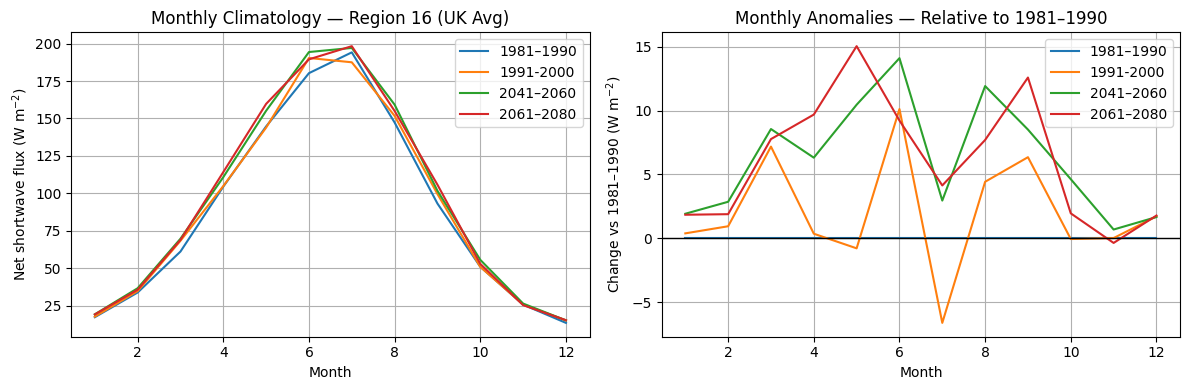


--- Monthly Climatologies (W m^-2) ---
        1981–1990   1991-2000   2041–2060   2061–2080
month                                                
1       17.280001   17.660000   19.200001   19.120001
2       33.770000   34.709999   36.619999   35.650002
3       61.130001   68.320000   69.690002   68.910004
4      104.510002  104.870003  110.830002  114.199997
5      144.710007  143.910004  155.169998  159.759995
6      180.279999  190.410004  194.399994  189.509995
7      194.169998  187.529999  197.119995  198.309998
8      147.320007  151.740005  159.240005  155.020004
9       93.180000   99.540001  101.699997  105.779999
10      50.970001   50.910000   55.599998   52.919998
11      25.700001   25.719999   26.389999   25.340000
12      13.480000   15.190000   15.140000   15.260000

--- Anomalies (W m^-2) ---
       1981–1990  1991-2000  2041–2060  2061–2080
month                                            
1            0.0       0.38       1.92       1.84
2            0.0       0.9

In [9]:
# Get months and years from cftime
months = [t.month for t in ds["time"].values]
years = [t.year for t in ds["time"].values]

rss_df = pd.DataFrame({
    "rss": rss_reg.values,
    "month": months,
    "year": years
})

# Periods for comparison
periods = {
    "1981–1990": (1981, 1990),
    "1991-2000": (1991, 2000),
    "2041–2060": (2041, 2060),
    "2061–2080": (2061, 2080),
}

# Monthly climatologies
clims = {}
for label, (y0, y1) in periods.items():
    subset = rss_df[(rss_df["year"] >= y0) & (rss_df["year"] <= y1)]
    clims[label] = subset.groupby("month")["rss"].mean()

clim_df = pd.DataFrame(clims)

# Anomalies (relative to baseline)
baseline = clim_df["1981–1990"]
anoms_df = clim_df.subtract(baseline, axis=0)

# Plot climatologies ---
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

clim_df.plot(ax=ax[0])
ax[0].set_xlabel("Month")
ax[0].set_ylabel("Net shortwave flux (W m$^{-2}$)")
ax[0].set_title("Monthly Climatology — Region 16 (UK Avg)")
ax[0].grid(True)

# Plot anomalies ---
anoms_df.plot(ax=ax[1])
ax[1].axhline(0, color="black", linewidth=1)
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Change vs 1981–1990 (W m$^{-2}$)")
ax[1].set_title("Monthly Anomalies — Relative to 1981–1990")
ax[1].grid(True)

plt.tight_layout()
plt.show()

# Print results
print("\n--- Monthly Climatologies (W m^-2) ---")
print(clim_df.round(2))
print("\n--- Anomalies (W m^-2) ---")
print(anoms_df.round(2))

In [10]:
# Aggregate over all spatial dimensions (UK mean)
rss_uk = ds["rss"].mean(dim=[dim for dim in ds["rss"].dims if dim not in ["time"]])

# Convert cftime to datetime64[ns] by mapping manually
if isinstance(rss_uk.time.values[0], cftime.Datetime360Day):
    # Convert each time to a pandas Timestamp
    time_index = pd.date_range(start=str(rss_uk.time.dt.year.min().values),
                               periods=rss_uk.time.size,
                               freq="MS")  # Monthly start
else:
    time_index = pd.to_datetime(rss_uk.time.values)

rss_uk = rss_uk.assign_coords(time=time_index)

# compute monthly climatology for a period
def climatology_for_period(start, end):
    mask = (rss_uk.time.dt.year >= start) & (rss_uk.time.dt.year <= end)
    return rss_uk.where(mask).groupby(rss_uk.time.dt.month).mean(dim="time")

# Periods to compare
periods = {
    "1981–1990": (1981, 1990),
    "1991–2000": (1991, 2000),
    "2041–2060": (2041, 2060),
    "2061–2080": (2061, 2080)
}

# Compute climatologies
monthly_data = {
    label: climatology_for_period(start, end).compute().values
    for label, (start, end) in periods.items()
}

# Put in a DataFrame
df = pd.DataFrame(monthly_data, index=range(1, 13))
df.index.name = "Month"
print(df)


        1981–1990   1991–2000   2041–2060   2061–2080
Month                                                
1       13.325625   14.260097   14.532641   14.709937
2       17.270014   17.205149   19.056477   18.932343
3       34.324013   35.394478   37.408600   36.288425
4       61.719097   67.633202   70.457680   69.656693
5      101.778847  105.309570  110.919510  113.654015
6      144.476471  148.024002  151.937622  158.073044
7      180.351608  186.908768  190.800125  187.566452
8      188.980286  185.788910  194.422943  192.696625
9      145.904984  150.312988  156.388046  152.976883
10      90.729553   98.513832  101.590614  104.269531
11      51.673340   51.581593   55.224476   54.191132
12      24.844624   25.135593   25.764751   25.105530


In [61]:
# File path
file_path_2 = "Data/rss_rcp85_land-rcm_uk_12km_27_mon_198012-208011.nc"

# 1. Open lazily
ds_12k = xr.open_dataset(file_path_2, engine="netcdf4", chunks={})

In [62]:
print (ds_12k)

<xarray.Dataset> Size: 44MB
Dimensions:                       (ensemble_member: 1, time: 1200,
                                   projection_y_coordinate: 112,
                                   projection_x_coordinate: 82, bnds: 2)
Coordinates:
  * ensemble_member               (ensemble_member) int32 4B 27
  * time                          (time) object 10kB 1980-12-16 00:00:00 ... ...
  * projection_y_coordinate       (projection_y_coordinate) float64 896B -1.0...
  * projection_x_coordinate       (projection_x_coordinate) float64 656B -2.1...
    ensemble_member_id            (ensemble_member) |S27 27B dask.array<chunksize=(1,), meta=np.ndarray>
    grid_latitude                 (projection_y_coordinate, projection_x_coordinate) float64 73kB dask.array<chunksize=(112, 82), meta=np.ndarray>
    grid_longitude                (projection_y_coordinate, projection_x_coordinate) float64 73kB dask.array<chunksize=(112, 82), meta=np.ndarray>
    month_number                  (time) int32 5

In [63]:
# Sanity: variables should include rss (W/m^2), grid_latitude, grid_longitude, year, month_number
print(ds_12k[['rss','grid_latitude','grid_longitude','year','month_number']])


<xarray.Dataset> Size: 44MB
Dimensions:                  (ensemble_member: 1, time: 1200,
                              projection_y_coordinate: 112,
                              projection_x_coordinate: 82)
Coordinates:
    grid_latitude            (projection_y_coordinate, projection_x_coordinate) float64 73kB dask.array<chunksize=(112, 82), meta=np.ndarray>
    grid_longitude           (projection_y_coordinate, projection_x_coordinate) float64 73kB dask.array<chunksize=(112, 82), meta=np.ndarray>
    year                     (time) int32 5kB dask.array<chunksize=(1200,), meta=np.ndarray>
    month_number             (time) int32 5kB dask.array<chunksize=(1200,), meta=np.ndarray>
  * ensemble_member          (ensemble_member) int32 4B 27
  * time                     (time) object 10kB 1980-12-16 00:00:00 ... 2080-...
  * projection_y_coordinate  (projection_y_coordinate) float64 896B -1.02e+05...
  * projection_x_coordinate  (projection_x_coordinate) float64 656B -2.1e+05 ...
    en

In [64]:
# Convert to Wh/m^2/day (monthly mean W/m^2 × 24h) ---
rss_daily_energy = ds_12k['rss'] * 24.0
rss_daily_energy.name = 'rss_daily_energy'  # Wh/m^2/day


In [65]:
# Define months and decades we’ll plot ---
months = {1: "Jan", 4: "Apr", 7: "Jul", 10: "Oct"}
decades = {
    1980: (1981, 1990),
    1990: (1991, 2000),
    2040: (2041, 2060),
    2060: (2061, 2080),
}

In [66]:
# Helper to subset by month + decade and average over time (+ ensemble) ---
def decadal_month_mean(data, month, start_year, end_year):
    sel = data.where(
        (ds_12k['month_number'] == month) &
        (ds_12k['year'] >= start_year) &
        (ds_12k['year'] <= end_year),
        drop=True
    )
    # Mean over time and (if present) ensemble_member
    dims_to_mean = [d for d in sel.dims if d in ('time', 'ensemble_member')]
    out = sel.mean(dim=dims_to_mean, keep_attrs=True)
    return out  # shape: (projection_y_coordinate, projection_x_coordinate)

In [67]:
def decadal_month_mean(data, month, start_year, end_year):
    # Force coords into memory to avoid boolean dask indexing error
    month_num = ds_12k['month_number'].compute()
    years = ds_12k['year'].compute()

    mask = ((month_num == month) &
            (years >= start_year) &
            (years <= end_year))

    sel = data.where(mask, drop=True)

    # Mean over time and (if present) ensemble_member
    dims_to_mean = [d for d in sel.dims if d in ('time', 'ensemble_member')]
    out = sel.mean(dim=dims_to_mean, keep_attrs=True)
    return out

In [68]:
# Precompute the 16 grids and global vmin/vmax for consistent color scale ---
grids = {}  # (month, decade_start) -> 2D DataArray
vmin, vmax = np.inf, -np.inf

for m in months.keys():
    for dstart, (y0, y1) in decades.items():
        arr = decadal_month_mean(rss_daily_energy, m, y0, y1)
        # Squeeze ensemble dim if still there
        for dim in ('ensemble_member',):
            if dim in arr.dims and arr.sizes[dim] == 1:
                arr = arr.isel({dim: 0}, drop=True)
        grids[(m, dstart)] = arr
        # Update global min/max (lazy-safe via .compute() on small stats)
        vmin = min(vmin, float(arr.min().compute()))
        vmax = max(vmax, float(arr.max().compute()))


In [69]:
# make the color scale a bit rounded
vmin = np.floor(vmin / 10.0) * 10.0
vmax = np.ceil(vmax / 10.0) * 10.0

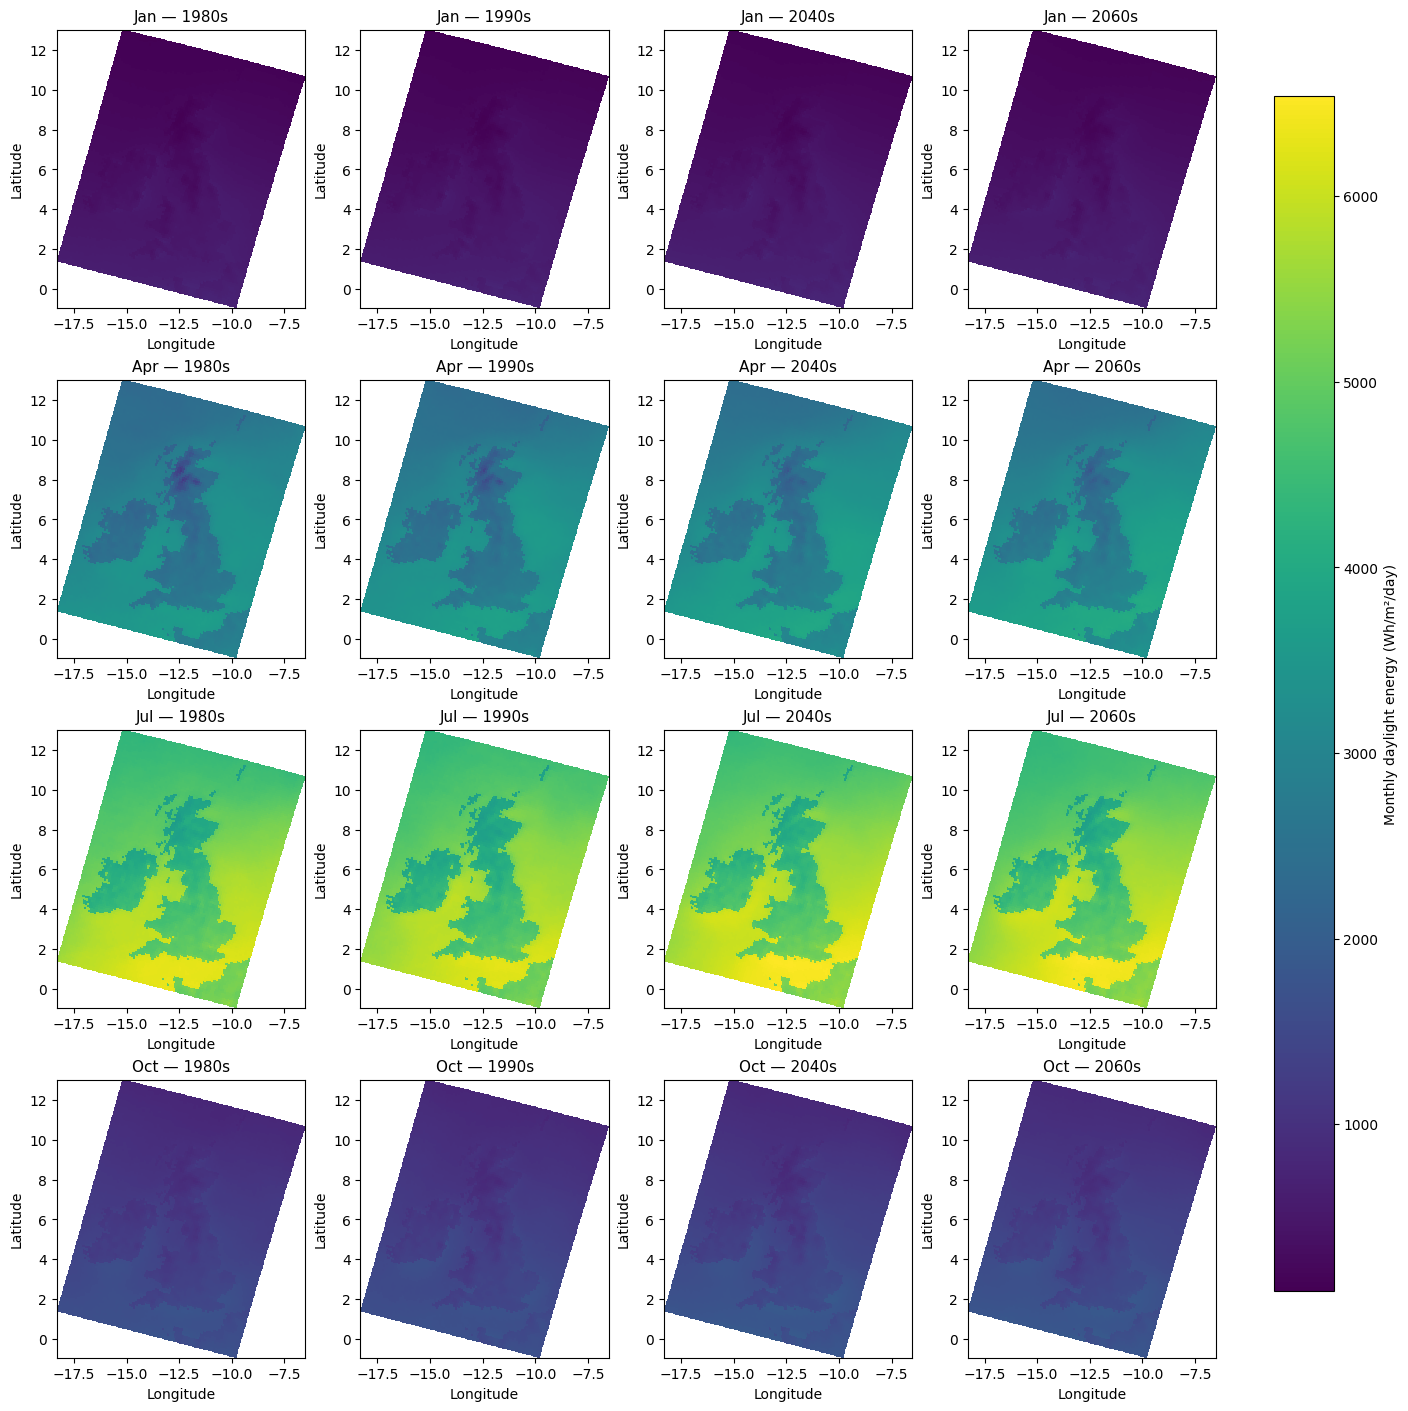

In [70]:
# Plot 4×4 maps using lon/lat without cartopy (works everywhere) ---
LON = ds_12k['grid_longitude']
LAT = ds_12k['grid_latitude']

fig, axes = plt.subplots(
    nrows=4, ncols=4, figsize=(14, 14), constrained_layout=True
)
cax = None
for r, (m, mlabel) in enumerate(months.items()):
    for c, dstart in enumerate(decades.keys()):
        ax = axes[r, c]
        data2d = grids[(m, dstart)]
        # pcolormesh expects (Y, X) 2D lon/lat and same-shaped data
        # To keep memory light, draw directly; dask will handle chunked eval
        h = ax.pcolormesh(
            LON, LAT, data2d,
            shading='auto', vmin=vmin, vmax=vmax
        )
        ax.set_title(f"{mlabel} — {dstart}s", fontsize=11)
        ax.set_xlabel("Longitude")
        ax.set_ylabel("Latitude")
        # Save last handle to build a single shared colorbar
        cax = h

# Shared colorbar
cb = fig.colorbar(cax, ax=axes, shrink=0.9)
cb.set_label("Monthly daylight energy (Wh/m²/day)")

plt.show()

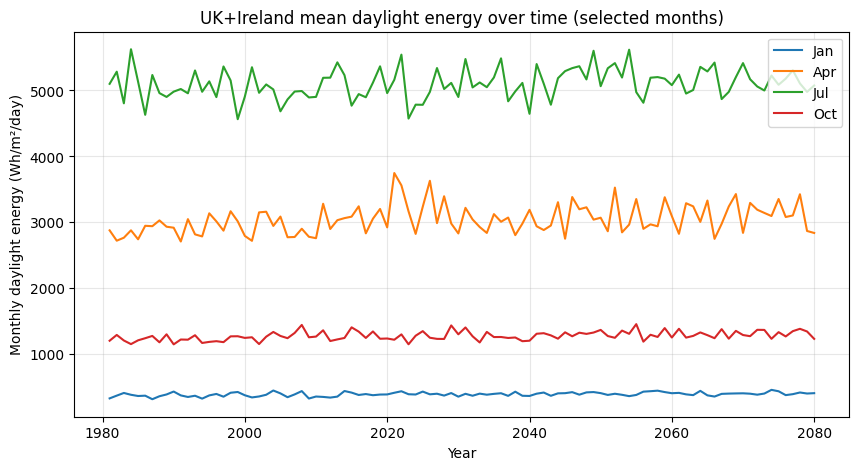

In [71]:
# Domain-mean time series for those months (UK+Ireland mean) ---
# Spatial mean across grid (keep time)
spatial_mean = rss_daily_energy.mean(dim=('projection_y_coordinate', 'projection_x_coordinate'))

# Precompute month/year to avoid dask boolean indexing issues
month_number = ds_12k['month_number'].compute()
year_number = ds_12k['year'].compute()

# Build a tidy dataframe: one column per selected month, indexed by year
records = []
for m in months.keys():
    sel = spatial_mean.where(month_number == m, drop=True)
    # Average across any ensemble dim if present
    if 'ensemble_member' in sel.dims:
        sel = sel.mean(dim='ensemble_member')
    df = pd.DataFrame({
        'year': year_number.where(month_number == m, drop=True).values,
        'value': sel.values,
        'month': months[m]
    })
    records.append(df)

tidy = pd.concat(records, ignore_index=True)

# Compute per-year means (one point per year per chosen month)
pivot = tidy.pivot_table(index='year', columns='month', values='value', aggfunc='mean').sort_index()

# Plot
plt.figure(figsize=(10,5))
for mlabel in [months[m] for m in months.keys()]:
    if mlabel in pivot.columns:
        plt.plot(pivot.index, pivot[mlabel], label=mlabel)
plt.xlabel("Year")
plt.ylabel("Monthly daylight energy (Wh/m²/day)")
plt.title("UK+Ireland mean daylight energy over time (selected months)")
plt.legend()
plt.grid(True, alpha=0.3)


In [72]:
# Select DJF months from 12km dataset ---
# Assuming ds_12k is already loaded
d12k = ds_12k.copy()

# Convert to Wh/m²/day (W/m² × 24h)
rss_daily_energy = d12k['rss'] * 24

# Filter for DJF (Dec, Jan, Feb)
djf_mask = d12k['month_number'].isin([12, 1, 2]).compute()
djf = rss_daily_energy.where(djf_mask, drop=True)

In [73]:
# Spatial mean across UK+Ireland ---
spatial_mean_djf = djf.mean(dim=('projection_y_coordinate', 'projection_x_coordinate'))



In [74]:
# Build decade labels ---
# Drop singleton ensemble dim if present ---
if 'ensemble_member' in spatial_mean_djf.dims and spatial_mean_djf.sizes['ensemble_member'] == 1:
    spatial_mean_djf = spatial_mean_djf.isel(ensemble_member=0, drop=True)

years_djf = d12k['year'].where(djf_mask, drop=True)
if 'ensemble_member' in years_djf.dims and years_djf.sizes['ensemble_member'] == 1:
    years_djf = years_djf.isel(ensemble_member=0, drop=True)

In [75]:
# Flatten both arrays ---
years_flat = years_djf.values.ravel()
values_flat = spatial_mean_djf.values.ravel()

# Build DataFrame ---
df = pd.DataFrame({
    'year': years_flat,
    'value': values_flat
}).dropna()

In [76]:
# Map years to decades ---
def decade_label(y):
    start = int(np.floor(y/10)*10 + 1)  # e.g., 1981–1990
    return f"{start}–{start+9}"

df['decade'] = df['year'].astype(int).apply(decade_label)

In [77]:
# Group by decade and compute mean ---
df_decade = df.groupby('decade')['value'].mean().reset_index()

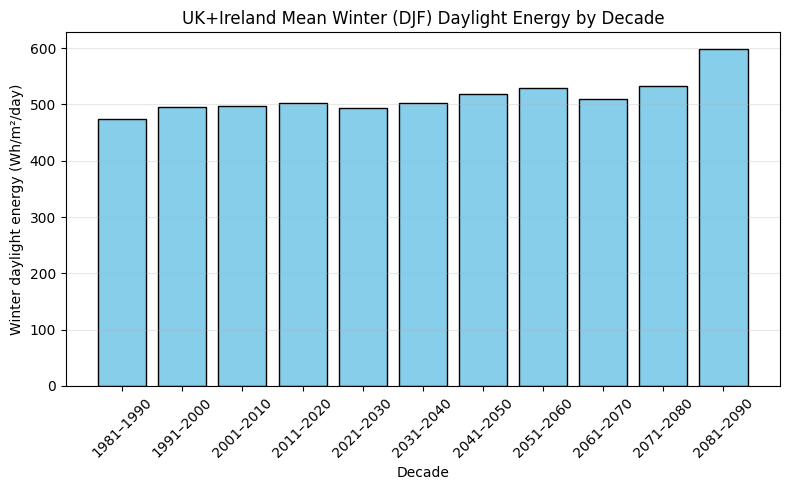

In [78]:
# Plot ---
plt.figure(figsize=(8,5))
plt.bar(df_decade['decade'], df_decade['value'], color='skyblue', edgecolor='k')
plt.ylabel("Winter daylight energy (Wh/m²/day)")
plt.xlabel("Decade")
plt.title("UK+Ireland Mean Winter (DJF) Daylight Energy by Decade")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

This will give you a clear decadal trend for winter daylight energy, which is where lighting demand is most sensitive.

In [33]:
# 1) Load the datasets 
# rss = surface downwelling shortwave radiation
d12k = xr.open_dataset("Data/rss_rcp85_land-rcm_uk_12km_27_mon_198012-208011.nc")
# clt = total cloud fraction
clt_ds = xr.open_dataset("Data/clt_rcp85_land-rcm_uk_12km_27_mon_198012-208011.nc")

In [34]:
# 2) Convert rss to daily daylight energy (Wh/m²/day) 
rss_daily_energy = d12k['rss'] * 24  # W/m² → Wh/m²/day approx

# 3) Build a DJF mask (Dec, Jan, Feb) 
djf_mask = d12k['month_number'].isin([12, 1, 2])

rss_djf = rss_daily_energy.where(djf_mask, drop=True)
clt_djf = clt_ds['clt'].where(djf_mask, drop=True)

In [35]:
# 4) Spatial mean (UK + Ireland) 
rss_djf_mean = rss_djf.mean(dim=('projection_y_coordinate', 'projection_x_coordinate'))
clt_djf_mean = clt_djf.mean(dim=('projection_y_coordinate', 'projection_x_coordinate'))


In [36]:
# 5) Create tidy DataFrame with matching years ---
years_djf = d12k['year'].where(djf_mask, drop=True)

df = pd.DataFrame({
    "year": years_djf.values,
    "rss": rss_djf_mean.mean(dim='ensemble_member').values if 'ensemble_member' in rss_djf_mean.dims else rss_djf_mean.values,
    "clt": clt_djf_mean.mean(dim='ensemble_member').values if 'ensemble_member' in clt_djf_mean.dims else clt_djf_mean.values,
}).dropna()


In [37]:
# 6) Assign decades 
def decade_label(y):
    start = int(np.floor(y/10)*10 + 1)  # e.g. 1981–1990
    return f"{start}–{start+9}"

df['decade'] = df['year'].apply(decade_label)

In [39]:
# 7) Compute decadal means 
decadal_means = df.groupby('decade')[['rss','clt']].mean()

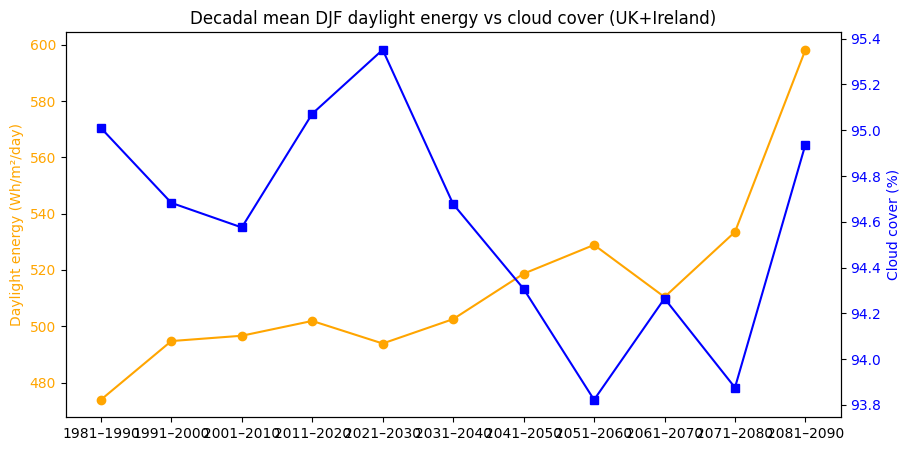

In [40]:
# 8) Plot side by side 
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.set_title("Decadal mean DJF daylight energy vs cloud cover (UK+Ireland)")
ax1.plot(decadal_means.index, decadal_means['rss'], marker='o', color='orange', label='Daylight energy (Wh/m²/day)')
ax1.set_ylabel("Daylight energy (Wh/m²/day)", color='orange')
ax1.tick_params(axis='y', labelcolor='orange')

ax2 = ax1.twinx()
ax2.plot(decadal_means.index, decadal_means['clt'], marker='s', color='blue', label='Cloud cover (%)')
ax2.set_ylabel("Cloud cover (%)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.show()

Over decades, daylight energy shows a gradual upward trend (≈ +100 Wh/m²/day from 1980s to 2080s).

Meanwhile, cloud cover fluctuates but remains remarkably stable (93.8–95.4%) — no strong long-term trend.

The decoupling means:

Increasing daylight energy in winter is not primarily due to reduced cloud cover.

Other drivers are at play — likely reduced atmospheric opacity (e.g. aerosols) or changes in solar angle/clear-sky transmission projected by the climate model.

Could also be influenced by cloud type changes (e.g. thinner cloud, more broken coverage) rather than absolute % cover.

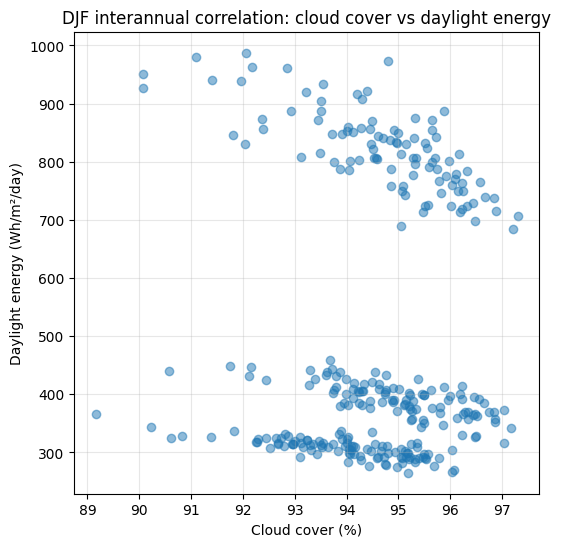

In [41]:
# 9) Correlation scatter 
plt.figure(figsize=(6,6))
plt.scatter(df['clt'], df['rss'], alpha=0.5)
plt.xlabel("Cloud cover (%)")
plt.ylabel("Daylight energy (Wh/m²/day)")
plt.title("DJF interannual correlation: cloud cover vs daylight energy")
plt.grid(True, alpha=0.3)
plt.show()

Clear negative correlation: higher cloud cover corresponds to lower daylight energy, as expected.

Interestingly, there seem to be two distinct clusters:

A higher-energy group (700–1000 Wh/m²/day) with cloud cover around 92–95%.

A lower-energy group (300–500 Wh/m²/day) with cloud cover clustered slightly higher, 93–97%.

This could indicate different weather regimes in winter:

Years with relatively fewer persistent cloud decks → more daylight energy.

Years dominated by overcast skies → much less daylight penetration.

So, daylight energy is not just linearly tied to cloud cover, but also to the type and persistence of cloudiness.

Implications for lighting design

Interannual variability is huge (scatter plot) → some winters could deliver 2× more daylight energy than others, meaning designs must account for “dark years” with very low daylight.

Decadal trend is modest but positive (line chart) → on average, there may be slightly better daylighting conditions in winter by the end of the century.

However, since cloud cover percentage is flat, this suggests sky character may change (perhaps more thin clouds, fewer dense overcast days). That has different implications for daylight quality and glare than for raw energy.

👉 In practical terms:

Buildings should still be designed for low-light winter baselines (cloudy clusters).

The long-term positive trend means slightly less reliance on artificial lighting in future winters, but the improvement is small compared to year-to-year swings.

For architects/engineers, robustness to variability matters more than the long-term average rise.

In [55]:

# From bar chart: approximate increase from 2000s → 2080s
delta_wh_per_m2_day = 100.0     # Wh/m²/day (outdoor daylight energy increase)

# Fraction of outdoor daylight that becomes useful indoor daylight
# (very rough “daylight utilisation” factor; 0.02–0.05)
utilisation = 0.03              # 3%

# Number of working/occupied days per year
workdays = 250

# CALCULATION 
# Convert to annual kWh/m²·yr impact on artificial lighting demand
annual_saving_kwh_per_m2 = (delta_wh_per_m2_day * utilisation * workdays) / 1000.0

print(f"Estimated lighting energy reduction: {annual_saving_kwh_per_m2:.2f} kWh/m²·yr")

Estimated lighting energy reduction: 0.75 kWh/m²·yr


In [57]:
import itertools

util_range = [0.02, 0.03, 0.05]
days_range  = [220, 250, 260]

rows = []
for u, d in itertools.product(util_range, days_range):
    kwh = (delta_wh_per_m2_day * u * d) / 1000.0
    rows.append({"utilisation": u, "workdays": d, "saving_kWh/m²·yr": round(kwh, 2)})

pd.DataFrame(rows)

,utilisation,workdays,saving_kWh/m²·yr
0,0.02,220,0.44
1,0.02,250,0.50
2,0.02,260,0.52
3,0.03,220,0.66
4,0.03,250,0.75
5,0.03,260,0.78
6,0.05,220,1.10
7,0.05,250,1.25
8,0.05,260,1.30




With Δ100 Wh/m²/day, 3% utilisation, 250 days, the rough reduction in artificial lighting is ~7.5 kWh/m²·yr.

Range with 2–5% utilisation: ~4.4 to ~13.0 kWh/m²·yr (at 250 days).

In [59]:
# Inputs
building_area_m2 = 1000                     # e.g., mid-size office
baseline_lighting_EUI = 25.0                # kWh/m²·yr (typical efficient office range 10–30+)

# Use result from above:
per_m2_saving = annual_saving_kwh_per_m2    # kWh/m²·yr

# CALCULATION 
total_saving_MWh = (per_m2_saving * building_area_m2) / 1000.0
baseline_total_MWh = (baseline_lighting_EUI * building_area_m2) / 1000.0
percent_reduction = 100.0 * total_saving_MWh / baseline_total_MWh if baseline_total_MWh > 0 else float("nan")

print(f"Building-level saving: {total_saving_MWh:.2f} MWh/yr")
print(f"Baseline lighting:     {baseline_total_MWh:.2f} MWh/yr (at {baseline_lighting_EUI} kWh/m²·yr)")
print(f"Share of baseline:     {percent_reduction:.1f}%")

Building-level saving: 0.75 MWh/yr
Baseline lighting:     25.00 MWh/yr (at 25.0 kWh/m²·yr)
Share of baseline:     3.0%


“Under UKCP18 RCP8.5, projected daylight energy increases could reduce office lighting demand by ~7–8 kWh/m²·yr by the 2080s (vs 2000s), assuming 3% daylight utilisation and 250 occupied days.”

Appl“For a 1000 m² office with a baseline 25 kWh/m²·yr lighting intensity, that’s about 7.5 MWh/yr (≈30%) lighting energy reduction — contingent on glazing/daylight design and controls.”